This notebook generates a UMAP visualization for the final embedding

In [2]:
import umap
import pickle
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
# read in embeddings and labels
with open('embedding256.pickle', 'rb') as fp:
    embedding256 = pickle.load(fp)
    print(type(embedding256))
    
with open('embedding128.pickle', 'rb') as fp:
    embedding128 = pickle.load(fp)
    print(type(embedding128))
        
with open('embedding64.pickle', 'rb') as fp:
    embedding64 = pickle.load(fp)
    print(type(embedding64))
        
with open('label_info.pickle', 'rb') as fp:
    label_info = pickle.load(fp)
    print(type(label_info))

print(embedding256.keys())
print(label_info.keys())

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
dict_keys(['embed_all', 'embed_raw', 'embed_l2_norm', 'restore_order', 'embed_correct_coverage_fh', 'embed_l2_norm_correct_coverage_fh'])
dict_keys(['batch id', 'age', 'total_cg', 'average_cg_rate', 'total_ch', 'average_ch_rate', 'hic_counts', 'cell_name_higashi', 'major', 'minor', 'cluster label', 'cluster label minor'])


In [6]:
# print the major and minor cluster labels
major = list(set(label_info['cluster label']))
minor = list(set(label_info['cluster label minor']))
major.sort()
minor.sort()
print(major)
print(minor)

['Astro', 'Endo', 'L2/3', 'L4', 'L5', 'L6', 'MG', 'MP', 'Ndnf', 'ODC', 'OPC', 'Pvalb', 'Sst', 'Vip']
['Astro-1', 'Endo-1', 'Endo-2', 'Endo-3', 'L2/3-1', 'L2/3-2', 'L2/3-3', 'L2/3-4', 'L4-1', 'L5-1', 'L5-2', 'L5-3', 'L6-1', 'L6-2', 'MG-1', 'MP-1', 'Ndnf-1', 'Ndnf-2', 'Ndnf-3', 'ODC-1', 'ODC-2', 'OPC-1', 'Pvalb-1', 'Pvalb-2', 'Sst-1', 'Sst-2', 'Sst-3', 'Vip-1', 'Vip-2']


In [7]:
embedding_keys = ['embed_raw', 'embed_l2_norm', 'embed_correct_coverage_fh', 'embed_l2_norm_correct_coverage_fh']
embedding_keys_short = ['raw','l2','fh','l2fh']

In [8]:
# get create dicts to map color to cluster
colordict14={}
colordict29={}

for i in range(len(major)):
    colordict14[major[i]] = cm.nipy_spectral(float(i) / len(major))
    
for i in range(len(minor)):
    colordict29[minor[i]] = cm.nipy_spectral(float(i) / len(minor))
    
cols14=list(colordict14.values())
labs14=list(colordict14.keys())
cols29=list(colordict29.values())
labs29=list(colordict29.keys())

In [12]:
def get_UMAP1(embedding_dict):
 
    # get UMAP embedding
    reducer = umap.UMAP()
    UMAPembedding = reducer.fit_transform(embedding_dict['embed_l2_norm'])

    # set colors
    colors14=[colordict14[cell] for cell in label_info['cluster label']]
    colors29=[colordict29[cell] for cell in label_info['cluster label minor']]

    # plot the UMAP embedding
    fig, (ax1, ax2) = plt.subplots(1,2)
    plt.subplots_adjust(right=1.5)
    fig.set_size_inches(13, 10)

    # first plot has the major cluster labels
    ax1.scatter(UMAPembedding[:, 0],
                UMAPembedding[:, 1],
                marker=".",
                s=30,
                lw=0,
                alpha=0.7,
                edgecolor="k",
                c=colors14)
    patches = []
    for i in range(len(cols14)):
        patches.append(mpatches.Patch(color=cols14[i], label=labs14[i]))
    ax1.legend(handles=patches, bbox_to_anchor=(1., 0.5), loc='center left')
    # ax1.set_title("UMAP Embedding for the " + str(embedding_keys[e]) + " clusters.")
    ax1.set_title("UMAP Embedding Visualization: Major Clusters")
    filename = '20240713/UMAPEmbed_L2major.png'
    fig.savefig(filename)
    plt.show()

    # second plot has the minor cluster labels
    fig, (ax1, ax2) = plt.subplots(1,2)
    plt.subplots_adjust(right=1.5)
    fig.set_size_inches(13, 10)
    ax1.scatter(UMAPembedding[:, 0],
                UMAPembedding[:, 1],
                marker=".",
                s=30,
                lw=0,
                alpha=0.7,
                edgecolor="k",
                c=colors29)
    patches2 = []
    for i in range(len(cols29)):
        patches2.append(mpatches.Patch(color=cols29[i], label=labs29[i]))
    ax1.legend(handles=patches2, bbox_to_anchor=(1., 0.5), loc='center left')
    # ax2.set_title("UMAP Embedding for the " + str(embedding_keys[e]) + " clusters.")
    ax1.set_title("UMAP Embedding Visualization: Minor Clusters")

    plt.gca().set_aspect('equal', 'datalim')

    filename = '20240713/UMAPEmbed_L2minor.png'
    fig.savefig(filename)
    plt.show()

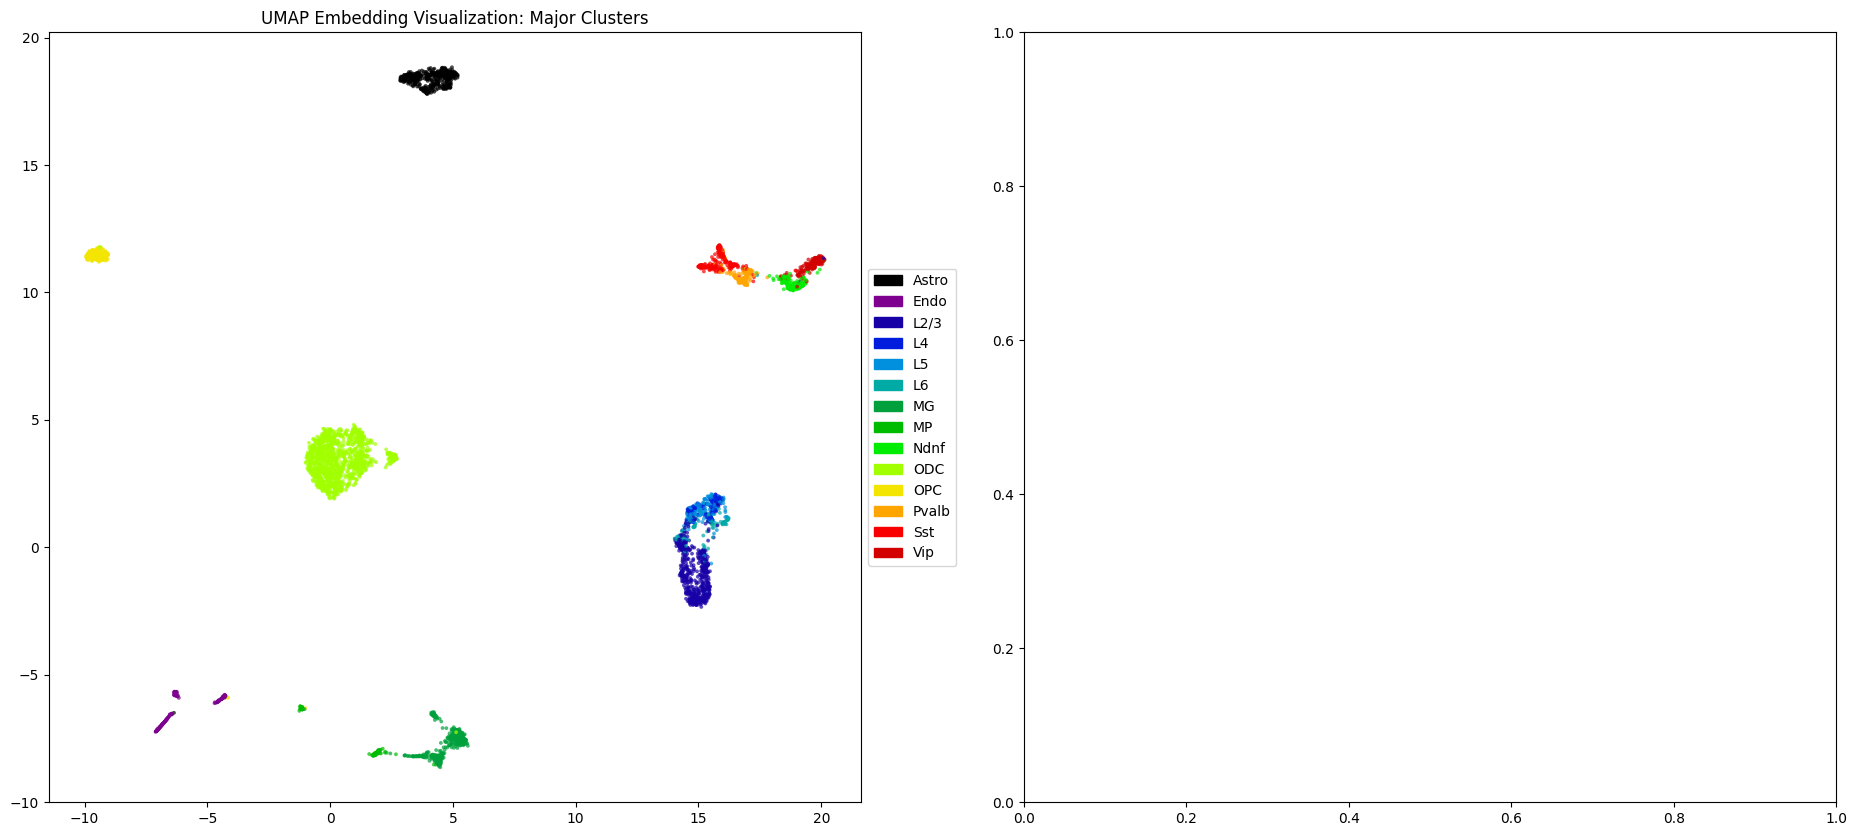

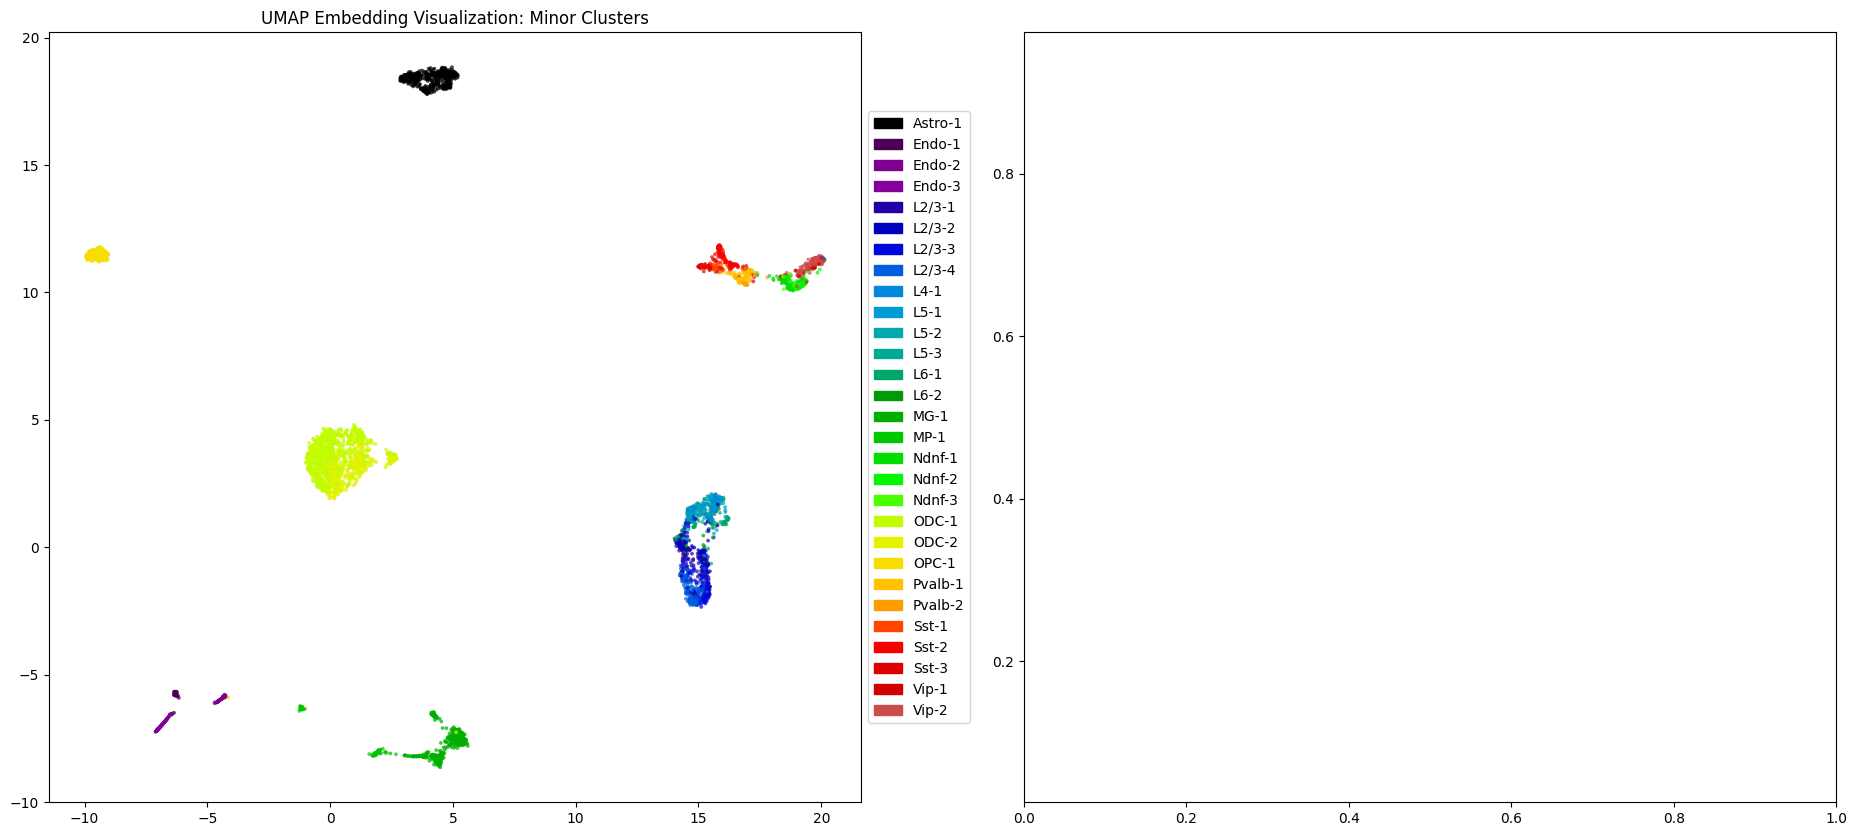

In [13]:
get_UMAP1(embedding64)